In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [26]:
mu = 5
sigma = 3

In [27]:
sample = np.random.normal(loc=mu, scale=sigma, size=20)
print(sample)

[ 8.03713656  6.64127674  5.31022976  4.20166558  0.36141951  7.79890999
  8.93509296  0.10612466  2.14398801  4.51353654  4.90763601  6.31406654
  5.2601498   8.39362567  6.66472683  3.79755251  5.37711953  2.76894866
 11.84667393  2.44892873]


In [28]:
N = stats.norm(loc=mu, scale=sigma)
Z = stats.norm(loc=0, scale=1)

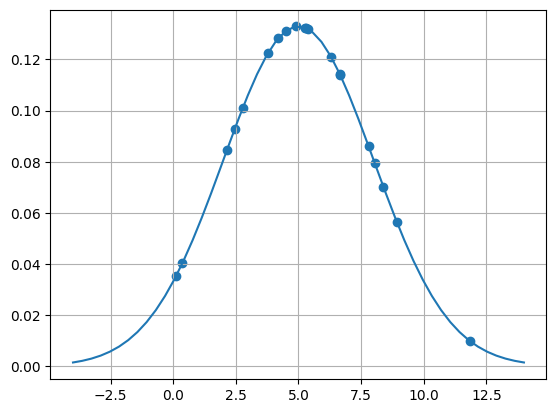

In [29]:
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma)
# plt.hist(sample, density=True, bins=20)
plt.scatter(sample, N.pdf(sample))
plt.plot(x, N.pdf(x))

# plt.scatter(mu * np.ones_like(sample), N.cdf(sample))
# plt.plot(x, N.cdf(x))
# plt.scatter(sample, N.cdf(sample))
# plt.scatter(mu, np.mean(N.cdf(sample)))

plt.grid()
plt.show()

In [58]:
def z_test(sample, mu_0 = 0, sigma = 1, alpha = 0.005):
    sample_size = np.size(sample)
    sample_mean = np.mean(sample)
    standart_error = sigma / np.sqrt(sample_size)
    z_score = (sample_mean - mu_0) / standart_error
    p_value = 2*(1 - Z.cdf(np.abs(z_score)))
    print(f"z-score : {z_score}\np-value : {p_value}\nreject : {p_value <= alpha}")

In [59]:
mu_0 = 5
z_test(sample, mu_0, sigma, alpha=0.01)

z-score : 0.4344537361413639
p-value : 0.6639589833436712
reject : False


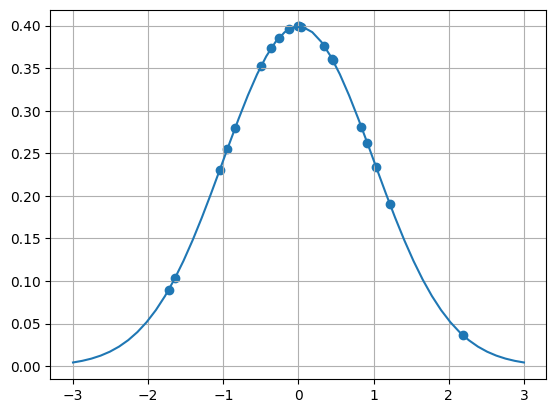

In [32]:
x = np.linspace(-3, 3)

n = np.size(sample)
m = np.mean(sample)

normalized_sample = (sample - m) / sigma

plt.scatter(normalized_sample, Z.pdf(normalized_sample))
plt.plot(x, Z.pdf(x))

plt.grid()
plt.show()

In [223]:
mu_0 = np.linspace(mu - sigma, mu + sigma)
p_value = z_test(sample, sigma, mu_0)
p_value

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.10862447e-15, 2.54130050e-13, 1.50769397e-11,
       6.45198894e-10, 1.99427613e-08, 4.45892728e-07, 7.22538802e-06,
       8.50695662e-05, 7.30204478e-04, 4.59092845e-03, 2.12812611e-02,
       7.34250648e-02, 1.91190490e-01, 3.83505211e-01, 6.10622704e-01,
       8.04601365e-01, 9.24413774e-01, 9.77923345e-01, 9.95199286e-01,
       9.99230143e-01, 9.99909559e-01, 9.99992253e-01, 9.99999518e-01,
       9.99999978e-01, 9.99999999e-01, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00])

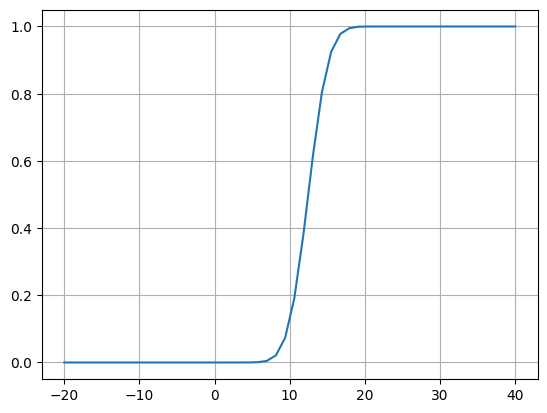

In [224]:
# plt.plot(mu_0, z_score)
plt.plot(mu_0, p_value)
plt.grid()
plt.show()

In [78]:
A = np.round(np.random.normal(size=12), 3)
B = np.round(np.random.normal(size=20), 3)

In [112]:
def t_test(a : np.ndarray, mu_0, alpha : float=0.005):
    n = np.size(a)
    m = np.mean(a)
    s = np.var(a, ddof=1)
    t = (m - mu_0) / np.sqrt(s / n)
    # print(f"statistic={t}")
    return t

In [113]:
t_test(a=A, mu_0=0)

0.8861162087422566

In [114]:
res = stats.ttest_1samp(A, 0, alternative='two-sided')
res

TtestResult(statistic=0.8861162087422566, pvalue=0.3945143630777921, df=11)

In [111]:
res.confidence_interval(confidence_level=0.95)

ConfidenceInterval(low=-0.33918477602454344, high=0.7963514426912102)